In [586]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.constants import N_A


In [587]:
def model(t, z, alpha1, alpha2, beta):

    dA1 = 2*alpha1*(1-z[0]-2*z[1])*(beta - z[0] - z[1]) - z[0] - alpha2*z[0]*(1-z[0]-2*z[1]) + 2*z[1]
    dA2 = alpha2*z[0]*(1-z[0]-2*z[1]) - 2*z[1]

    return [dA1, dA2]

In [588]:
tstart = 1e-10*1e-4
tend = 5*(1e-2)**0
tspan = [tstart, tend]
t = np.geomspace(tstart, tend, 500)
z0 = [0, 0]
alpha1 = 1e-2
beta = 1
alpha2 = 1e4

z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t, args=(alpha1, alpha2, beta))

In [589]:
epsilon = 1e-2
def A2_out(t):

    return (1- np.exp((2*beta-1)*epsilon*t))/(1- 2*np.exp((2*beta-1)*epsilon*t))

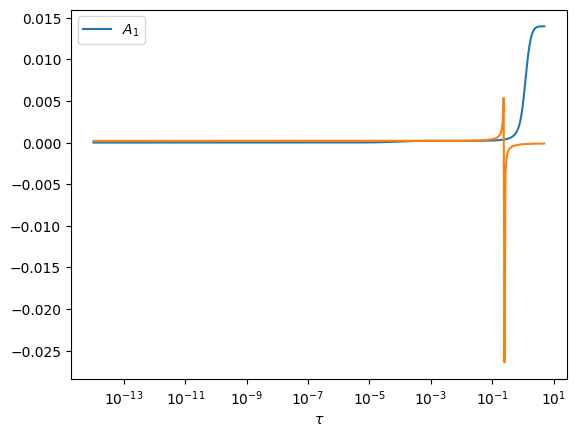

In [590]:
epsilon = 1e-2
plt.plot(t, z.y[0], label = r'$A_1$')
#plt.plot(t, z.y[1], label = r'$A_2$')
plt.plot(t, (epsilon**2)*(2*(1+2*t)/(1-4*t)))
#plt.plot(t, 2*t)
#plt.plot(t, A2_out(t))
#plt.plot(t, (epsilon**2)*2*A2_out(t)/(1 - 2*A2_out(t)))
#plt.plot(t, (epsilon**3)*2*(t*(epsilon**-1)))
#plt.plot(t, 2*(epsilon**3)*np.ones_like(t))
#plt.plot(t, 2*(epsilon**3)*(1 + 2*t))
#plt.plot(t, (epsilon**2)*2*(1-np.exp(-t*(epsilon**(-2)))))
#plt.plot(t, (epsilon**2)*2*((t*(epsilon**-2)) + np.exp(-(t*(epsilon**-2))) - 1))
#plt.plot(t, 2*(t))
#plt.plot(t, 2*(epsilon**3)*(1 - np.exp(-2*t*epsilon)))
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel(r"$\tau$")
plt.show()